In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',20)
pd.set_option('display.max_rows', 4000)

In [2]:
df=pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.drop(['capital-gain','capital-loss'],axis=1,inplace=True)

#### Replacing '?' to 'other' from the columns

In [5]:
df['workclass']=df['workclass'].replace(['?'],'Others')
df['native-country'] = df['native-country'].replace(['?'],'Others')
df['occupation'] = df['occupation'].replace(['?'],'Others')

In [6]:
df.shape

(48842, 13)

In [7]:
df.describe()

,age,fnlwgt,educational-num,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,40.422382
std,13.710510,1.056040e+05,2.570973,12.391444
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  hours-per-week   48842 non-null  int64 
 11  native-country   48842 non-null  object
 12  income           48842 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


In [9]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
df1=df.select_dtypes(include=['float64', 'int64'])
df2=df.select_dtypes(include=['object'])

In [11]:
df1.columns

Index(['age', 'fnlwgt', 'educational-num', 'hours-per-week'], dtype='object')

In [12]:
df2.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

# Univariate Analysis

## <ul><li>Understand the probability and frequency distribution of each numerical column</li></ul>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028560524790>,
      dtype=object)

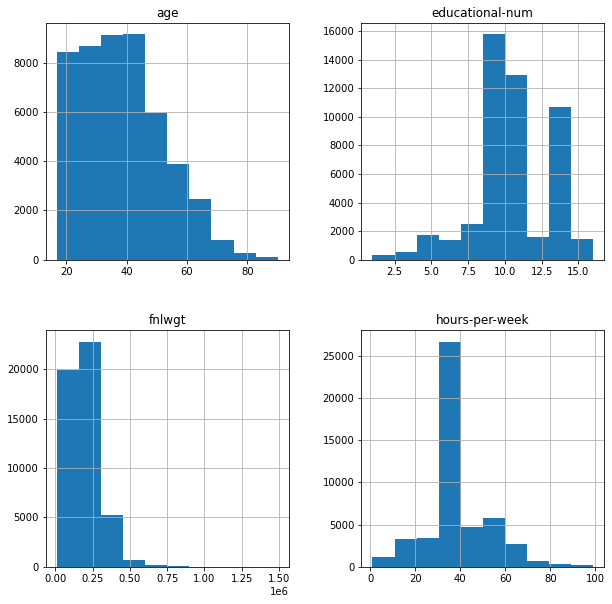

In [13]:
df1.hist(figsize=(10,10))

## <ul><li>Understand the frequency distribution of each categorical Column</li></ul>

In [14]:
df2.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [15]:
df2.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [16]:
df2['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [17]:
df2.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [18]:
df2.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [19]:
df2.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [20]:
df2.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [21]:
df2['native-country'].value_counts()

United-States                 43832
Mexico                          951
Others                          857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [22]:
df2.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

# Bivariate Analysis

## <ul><li>Discovering the relationships between numerical columns</li></ul>

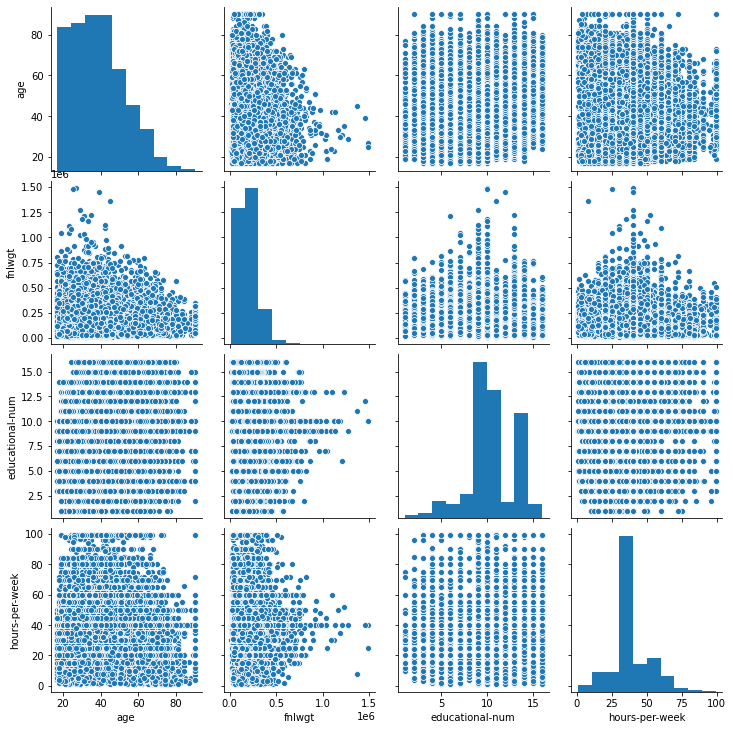

In [88]:
sns.pairplot(df1)

In [27]:
df1.corr()

,age,fnlwgt,educational-num,hours-per-week
age,1.000000,-0.076628,0.030940,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.143689
hours-per-week,0.071558,-0.013519,0.143689,1.000000


### Identifing the patterns between categorical and numerical

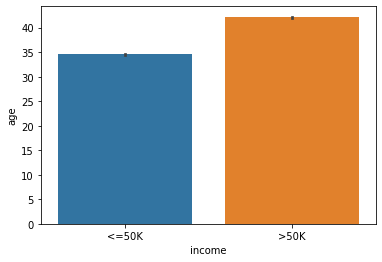

In [80]:
sns.barplot(data=df, x=df['income'], y=df['age'])

## Employees with age more then 35 are getting salary more than  50K

# <ul><li>Detecting Outliers</li></ul>

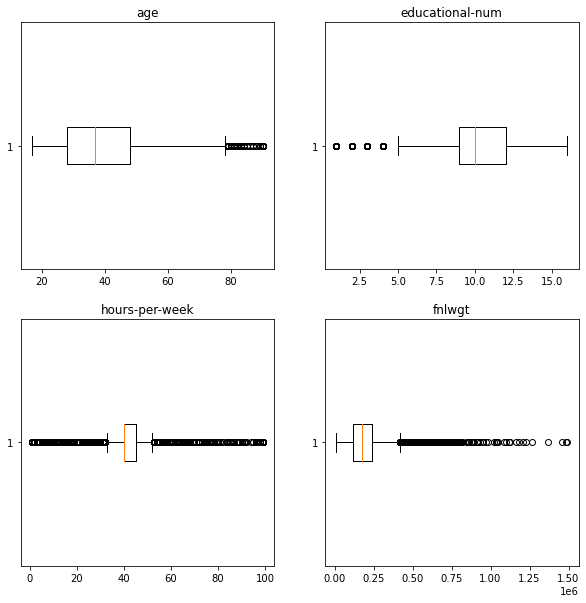

In [28]:
fig = plt.figure(figsize=(10,10))


graph1 = fig.add_subplot(2,2, 1 )
plt.boxplot(df['age'],vert=False)
graph1.set_title('age')


graph2 = fig.add_subplot(2,2, 2)
plt.boxplot(df['educational-num'],vert=False)
graph2.set_title('educational-num')            



graph3 = fig.add_subplot(2,2, 3 )
plt.boxplot(df['hours-per-week'],vert=False)
graph3.set_title('hours-per-week')


graph4 = fig.add_subplot(2,2, 4)
plt.boxplot(df.fnlwgt,vert=False)
graph4.set_title('fnlwgt')            
plt.show()

In [29]:
df[df.age>60]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
22,72,Others,132015,7th-8th,4,Divorced,Others,Not-in-family,White,Female,6,United-States,<=50K
35,65,Others,191846,HS-grad,9,Married-civ-spouse,Others,Husband,White,Male,40,United-States,<=50K
40,65,Private,136384,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,>50K
56,63,Private,145985,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
77,69,Self-emp-inc,174379,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,30,United-States,<=50K
125,69,Private,183791,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,25,United-States,<=50K
173,61,Private,21175,12th,8,Married-civ-spouse,Exec-managerial,Husband,White,Male,60,United-States,<=50K
185,64,Others,201368,Some-college,10,Married-civ-spouse,Others,Husband,White,Male,8,United-States,<=50K


In [30]:
median = df.loc[df['age']<60, 'age'].median()
df.loc[df.age > 60, 'age'] = np.nan
df.fillna(median,inplace=True)

In [31]:
df['age'][7]

36.0

In [32]:

df['fnlwgt'].quantile(0.75)

237642.0

In [33]:
df['fnlwgt'].quantile(0.25)

117550.5

In [34]:
median = df.loc[df['fnlwgt']<237642, 'fnlwgt'].median()
median

151626.0

In [35]:
df[df['fnlwgt']>237642]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
2,28.0,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
8,24.0,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K
13,58.0,Others,299831,HS-grad,9,Married-civ-spouse,Others,Husband,White,Male,35,United-States,<=50K
14,48.0,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,48,United-States,>50K
15,43.0,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48830,43.0,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,40,United-States,<=50K
48835,53.0,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
48836,22.0,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
48837,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K


In [36]:
median = df.loc[df['fnlwgt']<237642, 'fnlwgt'].median()
df.loc[df.fnlwgt >237642, 'fnlwgt'] = np.nan
df.fillna(median,inplace=True)

In [37]:
median = df.loc[df['fnlwgt']>117550, 'fnlwgt'].median()
df.loc[df.fnlwgt <117550, 'fnlwgt'] = np.nan
df.fillna(median,inplace=True)

In [38]:
df['fnlwgt'][2]

151626.0

In [39]:
df['educational-num'].quantile(0.75)

12.0

In [40]:
df['educational-num'].quantile(0.25)

9.0

In [41]:
median = df.loc[df['educational-num']<10, 'educational-num'].median()
median

9.0

In [42]:
df[df['educational-num']>10]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
2,28.0,Local-gov,151626.0,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
7,36.0,Self-emp-not-inc,151626.0,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K
11,36.0,Federal-gov,212465.0,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K
15,43.0,Private,151626.0,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
19,40.0,Private,151626.0,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,45,Others,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48829,36.0,Self-emp-not-inc,151626.0,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,60,United-States,<=50K
48833,43.0,Private,151626.0,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,45,United-States,<=50K
48834,32.0,Private,151626.0,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K
48835,53.0,Private,151626.0,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [43]:
mean = df.loc[df['educational-num']<10, 'educational-num'].mean() 
df.loc[df['educational-num'] >10 , 'educational-num'] = np.nan
df.fillna(mean,inplace=True)

In [44]:
mean = df.loc[df['educational-num']>6, 'educational-num'].mean() 
df.loc[df['educational-num'] <6 , 'educational-num'] = np.nan
df.fillna(mean,inplace=True)

In [45]:
df['educational-num'][2]

8.022440519105984

In [46]:
df['hours-per-week'].quantile(0.95)

60.0

In [47]:
df['hours-per-week'].quantile(0.05)

17.050000000000182

In [48]:
median = df.loc[df['hours-per-week']<45, 'hours-per-week'].median()
median

40.0

In [49]:
df[df['hours-per-week']>45]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
1,38.0,Private,151626.0,HS-grad,9.000000,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
14,48.0,Private,151626.0,HS-grad,9.000000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,48,United-States,>50K
15,43.0,Private,151626.0,Masters,8.022441,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
20,34.0,Private,151626.0,Bachelors,8.022441,Married-civ-spouse,Tech-support,Husband,White,Male,47,United-States,>50K
25,45.0,Self-emp-not-inc,151626.0,HS-grad,9.000000,Married-civ-spouse,Craft-repair,Husband,White,Male,90,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48817,34.0,Private,160216.0,Bachelors,8.022441,Never-married,Exec-managerial,Not-in-family,White,Female,55,United-States,>50K
48818,30.0,Private,151626.0,HS-grad,9.000000,Never-married,Craft-repair,Not-in-family,Black,Male,46,United-States,<=50K
48824,45.0,Local-gov,119199.0,Assoc-acdm,8.022441,Divorced,Prof-specialty,Unmarried,White,Female,48,United-States,<=50K
48829,36.0,Self-emp-not-inc,151626.0,Prof-school,8.022441,Never-married,Prof-specialty,Not-in-family,White,Male,60,United-States,<=50K


In [50]:
mean = df.loc[df['hours-per-week']<60,'hours-per-week'].mean()
df.loc[df['hours-per-week'] >60,'hours-per-week'] = np.nan
df.fillna(median,inplace=True)

In [51]:
mean= df.loc[df['hours-per-week']>15, 'hours-per-week'].mean()
df.loc[df['hours-per-week'] <15, 'hours-per-week'] = np.nan
df.fillna(median,inplace=True)

In [52]:
df['hours-per-week'][1]

50.0

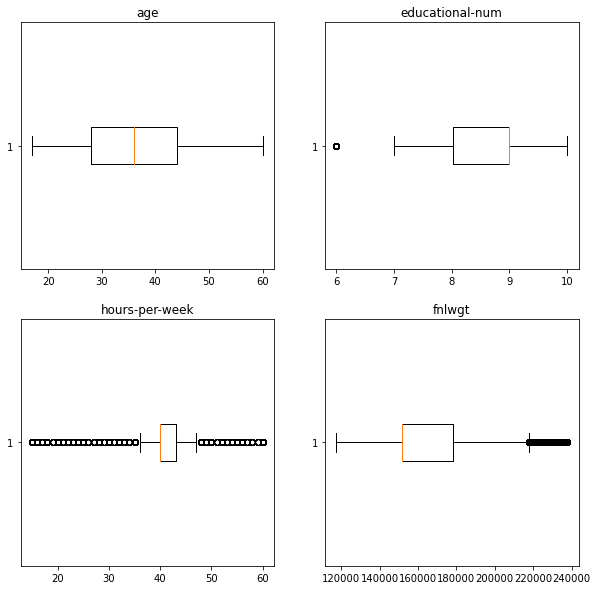

In [53]:
fig = plt.figure(figsize=(10,10))


graph1 = fig.add_subplot(2,2, 1 )
plt.boxplot(df['age'],vert=False)
graph1.set_title('age')


graph2 = fig.add_subplot(2,2, 2)
plt.boxplot(df['educational-num'],vert=False)
graph2.set_title('educational-num')            



graph3 = fig.add_subplot(2,2, 3 )
plt.boxplot(df['hours-per-week'],vert=False)
graph3.set_title('hours-per-week')


graph4 = fig.add_subplot(2,2, 4)
plt.boxplot(df.fnlwgt,vert=False)
graph4.set_title('fnlwgt')            
plt.show()

# <ul><li>Performing one hot encoding using dummy variable</li></ul>

In [56]:
dummies = pd.get_dummies(df2)
dummies

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Others,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
48838,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
48839,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
48840,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [57]:
merged = pd.concat([df, dummies], axis='columns')
merged

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25.0,Private,226802.0,11th,7.000000,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0,0,0,0,0,1,0,0,1,0
1,38.0,Private,151626.0,HS-grad,9.000000,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0,0,0,0,0,1,0,0,1,0
2,28.0,Local-gov,151626.0,Assoc-acdm,8.022441,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0,0,0,0,0,1,0,0,0,1
3,44.0,Private,160323.0,Some-college,10.000000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0,0,0,0,0,1,0,0,0,1
4,18.0,Others,151626.0,Some-college,10.000000,Never-married,Others,Own-child,White,Female,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,151626.0,Assoc-acdm,8.022441,Married-civ-spouse,Tech-support,Wife,White,Female,...,0,0,0,0,0,1,0,0,1,0
48838,40.0,Private,154374.0,HS-grad,9.000000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,0,0,0,0,0,1,0,0,0,1
48839,58.0,Private,151910.0,HS-grad,9.000000,Widowed,Adm-clerical,Unmarried,White,Female,...,0,0,0,0,0,1,0,0,1,0
48840,22.0,Private,201490.0,HS-grad,9.000000,Never-married,Adm-clerical,Own-child,White,Male,...,0,0,0,0,0,1,0,0,1,0


In [58]:
final = merged.drop(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country','income'], axis='columns')
final

,age,fnlwgt,educational-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Others,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25.0,226802.0,7.000000,40.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,38.0,151626.0,9.000000,50.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,28.0,151626.0,8.022441,40.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44.0,160323.0,10.000000,40.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,18.0,151626.0,10.000000,30.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,151626.0,8.022441,38.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
48838,40.0,154374.0,9.000000,40.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
48839,58.0,151910.0,9.000000,40.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
48840,22.0,201490.0,9.000000,20.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [59]:
final.columns

Index(['age', 'fnlwgt', 'educational-num', 'hours-per-week',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Others', 'workclass_Private',
       'workclass_Self-emp-inc',
       ...
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia', 'income_<=50K',
       'income_>50K'],
      dtype='object', length=108)

### Checking wheather the target column is balance or imbalance

In [63]:
final['income_>50K'].value_counts()

0    37155
1    11687
Name: income_>50K, dtype: int64

In [64]:
x=final.drop(['income_<=50K','income_>50K'],axis=1)

In [65]:
y=final['income_>50K']

In [66]:
#Performing train test split
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)


## Performing oversampling

In [67]:
from collections import Counter 
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))


The number of classes before fit Counter({0: 26017, 1: 8172})
The number of classes after fit Counter({0: 26017, 1: 19512})


C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [68]:
# importing the libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [69]:
names = ["LogisticRegression", " SVC", "GradientBoostingClassifier", "DecisionTreeClassifier", "ExtraTreesClassifier",
         "RandomForestClassifier", "AdaBoostClassifier"]

In [70]:
classifiers = [
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100)]

In [71]:

scores = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train_ns,y_train_ns)
    score = clf.score(x_test, y_test)
    scores.append(score)

## Creating a table to compare the performance of each of the ML Model.


In [72]:
df3 = pd.DataFrame()
df3['name'] = names
df3['score'] = scores
df3

,name,score
0,LogisticRegression,0.760117
1,SVC,0.747219
2,GradientBoostingClassifier,0.805091
3,DecisionTreeClassifier,0.768102
4,ExtraTreesClassifier,0.803317
5,RandomForestClassifier,0.755681
6,AdaBoostClassifier,0.811916


In [73]:
df4 = df3.sort_values('score',ascending=False)
df4

,name,score
6,AdaBoostClassifier,0.811916
2,GradientBoostingClassifier,0.805091
4,ExtraTreesClassifier,0.803317
3,DecisionTreeClassifier,0.768102
0,LogisticRegression,0.760117
5,RandomForestClassifier,0.755681
1,SVC,0.747219
